<a href="https://colab.research.google.com/github/csoren66/Dog-Vs-Cat-Classification-using-transfer-Learning/blob/main/cats_and_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Vs Cat Classification using transfer Learning

In [27]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing The Dog vs Cat Dataset from Kaggle

In [29]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [31]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [32]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [33]:
import os
# counting the number of files in trained folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images', file_count)

Number of images 25000


Printing the name of images

In [34]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.3161.jpg', 'cat.3185.jpg', 'dog.6934.jpg', 'cat.5649.jpg', 'cat.9955.jpg', 'dog.6391.jpg', 'cat.179.jpg', 'dog.11521.jpg', 'dog.2734.jpg', 'cat.1972.jpg', 'dog.3170.jpg', 'dog.3711.jpg', 'cat.9291.jpg', 'cat.485.jpg', 'dog.5900.jpg', 'dog.6253.jpg', 'cat.1190.jpg', 'cat.6978.jpg', 'cat.3450.jpg', 'dog.4702.jpg', 'cat.7165.jpg', 'dog.9903.jpg', 'dog.2300.jpg', 'cat.8990.jpg', 'cat.390.jpg', 'dog.1867.jpg', 'cat.11042.jpg', 'cat.7955.jpg', 'dog.4128.jpg', 'dog.9146.jpg', 'cat.5000.jpg', 'cat.12306.jpg', 'cat.2589.jpg', 'dog.3619.jpg', 'cat.3177.jpg', 'dog.11516.jpg', 'dog.11194.jpg', 'cat.3306.jpg', 'cat.8030.jpg', 'cat.9264.jpg', 'dog.169.jpg', 'cat.11262.jpg', 'dog.9681.jpg', 'cat.11092.jpg', 'dog.2975.jpg', 'cat.1771.jpg', 'dog.8088.jpg', 'cat.297.jpg', 'dog.7232.jpg', 'dog.8310.jpg', 'dog.6634.jpg', 'dog.8250.jpg', 'dog.10757.jpg', 'dog.3300.jpg', 'dog.10772.jpg', 'cat.9644.jpg', 'cat.8567.jpg', 'cat.2488.jpg', 'dog.2210.jpg', 'cat.6075.jpg', 'dog.10148.jpg', 'cat.5153.jpg', 'd

Importing the dependencies

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

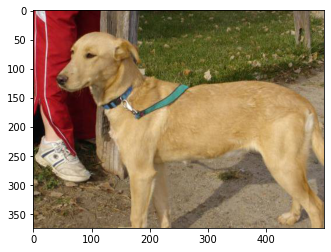

In [36]:
# display dog image
img = mping.imread('/content/train/dog.12282.jpg')
imgplt = plt.imshow(img)
plt.show()

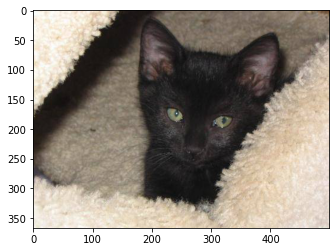

In [37]:
# display cat image
img = mping.imread('/content/train/cat.190.jpg')
imgplt = plt.imshow(img)
plt.show()

In [38]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
dog
cat
cat


In [39]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the Images

In [42]:
#Creating a directory for resize images
os.mkdir('/content/image_resized')

In [43]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

<b>Creating labels for resized images of dogs and cats</b>

<br>Cat ---> 0</br>
Dog ---> 1

In [49]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image_resized/')

labels = []
for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [50]:
print(filenames[0:5])
print(len(filenames))

['dog.3161.jpg', 'cat.3185.jpg', 'dog.6934.jpg', 'cat.5649.jpg', 'cat.9955.jpg']
2000


In [51]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
2000


In [52]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1025  975]


Converting all resized images to numpy arrays

In [53]:
import cv2
import glob

In [54]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [55]:
print(dog_cat_images)

[[[[ 75 109  92]
   [ 60  94  77]
   [ 56  85  70]
   ...
   [111 109  79]
   [ 93  90  62]
   [ 89  86  58]]

  [[ 53  87  70]
   [ 48  82  65]
   [ 49  80  65]
   ...
   [ 90  88  58]
   [ 82  79  51]
   [ 85  82  54]]

  [[ 45  82  62]
   [ 52  87  67]
   [ 57  89  72]
   ...
   [ 86  83  55]
   [ 84  80  55]
   [ 91  87  62]]

  ...

  [[ 72  91  96]
   [ 68  87  92]
   [ 72  89  92]
   ...
   [255 254 255]
   [255 254 255]
   [255 253 255]]

  [[ 71  89  96]
   [ 73  92  97]
   [ 68  87  90]
   ...
   [255 254 255]
   [255 254 255]
   [255 253 255]]

  [[ 75  93 100]
   [ 79  98 103]
   [ 68  87  92]
   ...
   [255 254 255]
   [255 254 255]
   [255 253 255]]]


 [[[255 255 246]
   [241 236 227]
   [176 170 165]
   ...
   [ 37  34  50]
   [ 35  32  48]
   [ 33  30  46]]

  [[255 254 245]
   [240 235 226]
   [174 168 163]
   ...
   [ 36  33  49]
   [ 35  32  48]
   [ 33  30  46]]

  [[255 255 246]
   [239 234 225]
   [171 165 160]
   ...
   [ 36  32  51]
   [ 36  32  51]
   [ 35  31

In [56]:
type(dog_cat_images)

numpy.ndarray

In [58]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [59]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


<br>1600 ---> Training images</br>
<br>400 ---> Test images</br>

In [62]:
# Scaling the data
X_train_scaled =X_train/255
X_test_scaled = X_test/255

In [63]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.98431373 1.         0.99607843]
   [0.9372549  0.96078431 0.94117647]
   [0.95686275 0.98039216 0.96078431]]

  [[1.         1.         1.        ]
   [1. 

<b> Building the Neural Network  </b>

In [64]:
import tensorflow as tf
import tensorflow_hub as hub

In [65]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [67]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [69]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [70]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 63s 1s/step - loss: 0.1552 - acc: 0.9419
Epoch 2/5
50/50 [==============================] - 47s 935ms/step - loss: 0.0480 - acc: 0.9881
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.0375 - acc: 0.9925
Epoch 4/5
50/50 [==============================] - 59s 1s/step - loss: 0.0290 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 43s 859ms/step - loss: 0.0236 - acc: 0.9950


In [71]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print ('Test accuarcy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0486 - acc: 0.9800
Test Loss = 0.04859357699751854
Test accuarcy = 0.9800000190734863


<b> Predictive System </b>

Path of the image to be predicted: /content/image_resized/cat.10015.jpg


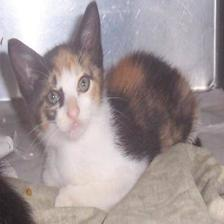

[[ 3.6811845 -5.0323963]]
0
The image represent a Cat :


In [72]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represent a Cat :')
else:
  print('The image represent a dog')

Path of the image to be predicted: /content/dog.jpg


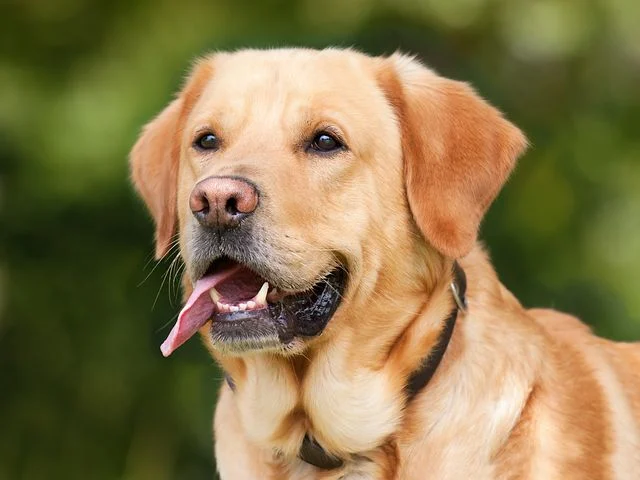

[[-5.161638  4.972619]]
1
The image represent a dog


In [73]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represent a Cat :')
else:
  print('The image represent a dog')